In [49]:
### 한글 폰트 설정
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform
import numpy as np

path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

%matplotlib inline

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [51]:
import pandas as pd

train = pd.read_csv("data/parking_demand/train_df_errno.csv")
test = pd.read_csv("data/parking_demand/test_df.csv")
sub = pd.read_csv("data/parking_demand/sample_submission.csv")
age = pd.read_csv("data/parking_demand/age_gender_info.csv")

train.shape, test.shape, sub.shape, age.shape

((2896, 15), (1008, 14), (150, 2), (16, 23))

In [52]:
train.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '등록차량수'],
      dtype='object')

(array([ 12.,   6.,  85., 180., 352., 314., 649., 781., 399., 118.]),
 array([2.56494936, 3.09283929, 3.62072921, 4.14861914, 4.67650907,
        5.204399  , 5.73228893, 6.26017885, 6.78806878, 7.31595871,
        7.84384864]),
 <BarContainer object of 10 artists>)

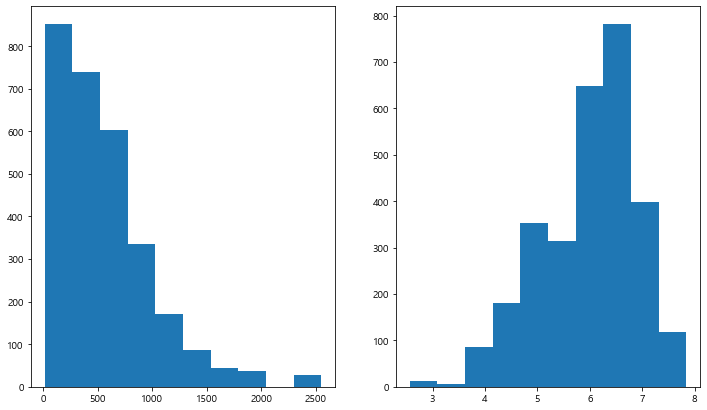

In [53]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,7))

ax1.hist(train['등록차량수'])
ax2.hist(np.log(train['등록차량수']))  #로그를 씌우면 좀 더 정교화 된듯 

## train과 test 데이터 셋을 붙여서 확인해보자 

In [54]:
all_df = pd.concat([train, test], join='inner')
all_df

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,A,9216000,82940,0.0,3.0,624.0
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,A,12672000,107130,0.0,3.0,624.0
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,A,12672000,107130,0.0,3.0,624.0
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,A,18433000,149760,0.0,3.0,624.0
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,A,18433000,149760,0.0,3.0,624.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,C1267,675,아파트,경상남도,행복주택,36.77,126,38.0,L,-,-,0.0,1.0,467.0
1004,C2189,382,아파트,전라북도,국민임대,29.19,96,45.0,H,6872000,106400,0.0,2.0,300.0
1005,C2189,382,아파트,전라북도,국민임대,29.19,20,45.0,H,6872000,106400,0.0,2.0,300.0
1006,C2189,382,아파트,전라북도,국민임대,39.45,202,45.0,H,13410000,144600,0.0,2.0,300.0


In [55]:
all_df.isnull().sum()

단지코드            0
총세대수            0
임대건물구분          0
지역              0
공급유형            0
전용면적            0
전용면적별세대수        0
공가수             0
자격유형            2
임대보증금         749
임대료           749
10분내지하철수      249
10분내버스정류장수      4
단지내주차면수         0
dtype: int64

In [56]:
all_df.loc[all_df['자격유형'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수
196,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000,37470,0.0,2.0,840.0
258,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000,44770,0.0,2.0,173.0


In [57]:
all_df.loc[ 196, "자격유형"] = 'A'
all_df.loc[ 258, "자격유형"] = 'C'

In [58]:
mapping = { 'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 
            'F':6, 'G':7, 'H':8, 'I':9, 'J':10, 
            'K':11, 'L':12, 'M':13, 'N':14, 'O':15  }

all_df['자격유형'] =all_df['자격유형'].map(mapping).astype(int)

In [59]:
all_df.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,1,9216000,82940,0.0,3.0,624.0
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,1,12672000,107130,0.0,3.0,624.0
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,1,12672000,107130,0.0,3.0,624.0
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,1,18433000,149760,0.0,3.0,624.0
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,1,18433000,149760,0.0,3.0,624.0


In [60]:
all_df.isnull().sum()

단지코드            0
총세대수            0
임대건물구분          0
지역              0
공급유형            0
전용면적            0
전용면적별세대수        0
공가수             0
자격유형            0
임대보증금         749
임대료           749
10분내지하철수      249
10분내버스정류장수      4
단지내주차면수         0
dtype: int64

In [61]:
all_df.corr()['10분내버스정류장수']

총세대수         -0.002576
전용면적          0.002303
전용면적별세대수      0.040635
공가수           0.038906
자격유형         -0.014581
10분내지하철수      0.058901
10분내버스정류장수    1.000000
단지내주차면수       0.097617
Name: 10분내버스정류장수, dtype: float64

In [62]:
all_df.loc[all_df['10분내버스정류장수'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수
2293,N2431,1047,아파트,경상남도,공공임대(10년),74.97,80,15.0,1,46000000,456000,NaN,NaN,1066.0
2294,N2431,1047,아파트,경상남도,공공임대(10년),84.95,124,15.0,1,57000000,462000,NaN,NaN,1066.0
2295,N2431,1047,아파트,경상남도,공공임대(10년),84.96,289,15.0,1,57000000,462000,NaN,NaN,1066.0
2296,N2431,1047,아파트,경상남도,공공임대(10년),84.98,82,15.0,1,57000000,462000,NaN,NaN,1066.0


In [63]:
# 임대건물구분 과 지역을 그룹으로 묶고, 아파트 경상남도 부분의 '10분내버스정류장수'만 평균으로 가져와줘. 
grouped = train.groupby(['임대건물구분', '지역'])
group1 = grouped.get_group( ('아파트', '경상남도')  )
group1['10분내버스정류장수'].mean()

3.996268656716418

In [64]:
val = group1['10분내버스정류장수'].mean()
all_df.loc[ all_df['10분내버스정류장수'].isnull(), "10분내버스정류장수"] = val
all_df.loc[all_df['10분내버스정류장수'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수


In [65]:
# test_df.loc[ test_df['10분내버스정류장수'].isnull(), "10분내버스정류장수"] = 4

## 라벨 인코딩 - 문자를 숫자로 변경

In [66]:
gubun1 = {'아파트':1, '상가':2}
gubun2 = {'경상남도':1, '대전광역시':2, '경기도':3, '전라북도':4, 
          '강원도':5, '광주광역시':6, '충청남도':7, '부산광역시':8, 
          '제주특별자치도':9, '울산광역시':10, '충청북도':11, '전라남도':12, 
          '경상북도':13, '대구광역시':14, '서울특별시':15, '세종특별자치시':16}

gubun3 = {'국민임대':1, '공공임대(50년)':2, '영구임대':3, '임대상가':4, 
          '공공임대(10년)':5, '공공임대(분납)':6, '장기전세':7, '공공분양':8, 
          '행복주택':9, '공공임대(5년)':10}

all_df['임대건물구분_lbl'] = all_df['임대건물구분'].map(gubun1)
all_df['지역_lbl'] = all_df['지역'].map(gubun2)
all_df['공급유형_lbl'] = all_df['공급유형'].map(gubun3)

all_df

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,임대건물구분_lbl,지역_lbl,공급유형_lbl
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,1,9216000,82940,0.0,3.0,624.0,1,1,1
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,1,12672000,107130,0.0,3.0,624.0,1,1,1
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,1,12672000,107130,0.0,3.0,624.0,1,1,1
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,1,18433000,149760,0.0,3.0,624.0,1,1,1
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,1,18433000,149760,0.0,3.0,624.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,C1267,675,아파트,경상남도,행복주택,36.77,126,38.0,12,-,-,0.0,1.0,467.0,1,1,9
1004,C2189,382,아파트,전라북도,국민임대,29.19,96,45.0,8,6872000,106400,0.0,2.0,300.0,1,4,1
1005,C2189,382,아파트,전라북도,국민임대,29.19,20,45.0,8,6872000,106400,0.0,2.0,300.0,1,4,1
1006,C2189,382,아파트,전라북도,국민임대,39.45,202,45.0,8,13410000,144600,0.0,2.0,300.0,1,4,1


In [67]:
all_df['단지코드'] = all_df['단지코드'].astype("category")
all_df['단지코드_lbl'] = all_df['단지코드'].cat.codes

### 전용면적을 구간화하기
all_df['전용면적별세대수'] = all_df['전용면적별세대수'].astype('float32')

# 전용면적, 공가수, 단지내주차면수
all_df['qcut_총세대수'] = pd.qcut(all_df['총세대수'], 5, labels=False)   #구간분할 해주기(총세대수에 대해서)
all_df.head(10)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,임대건물구분_lbl,지역_lbl,공급유형_lbl,단지코드_lbl,qcut_총세대수
0,C2515,545,아파트,경상남도,국민임대,33.48,276.0,17.0,1,9216000,82940,0.0,3.0,624.0,1,1,1,492,1
1,C2515,545,아파트,경상남도,국민임대,39.60,60.0,17.0,1,12672000,107130,0.0,3.0,624.0,1,1,1,492,1
2,C2515,545,아파트,경상남도,국민임대,39.60,20.0,17.0,1,12672000,107130,0.0,3.0,624.0,1,1,1,492,1
3,C2515,545,아파트,경상남도,국민임대,46.90,38.0,17.0,1,18433000,149760,0.0,3.0,624.0,1,1,1,492,1
4,C2515,545,아파트,경상남도,국민임대,46.90,19.0,17.0,1,18433000,149760,0.0,3.0,624.0,1,1,1,492,1
5,C2515,545,아파트,경상남도,국민임대,51.97,106.0,17.0,1,23042000,190090,0.0,3.0,624.0,1,1,1,492,1
6,C2515,545,아파트,경상남도,국민임대,51.97,26.0,17.0,1,23042000,190090,0.0,3.0,624.0,1,1,1,492,1
7,C1407,1216,아파트,대전광역시,국민임대,30.95,288.0,13.0,1,15620000,127350,1.0,1.0,1285.0,1,2,1,131,3
8,C1407,1216,아파트,대전광역시,국민임대,30.99,68.0,13.0,1,15620000,127350,1.0,1.0,1285.0,1,2,1,131,3
9,C1407,1216,아파트,대전광역시,국민임대,30.99,34.0,13.0,1,15620000,127350,1.0,1.0,1285.0,1,2,1,131,3


## 전용면적별 세대의 합계와 총세대수가 일치하지 않는 오류
* 차이가 14세대 이하인 48개 단지 - ['C1925', 'C1312', 'C2013', 'C1424', 'C2520', 'C2319', 'C1850', 'C1068', 'C2644', 'C2156', C2453', 'C1910', 'C2139', 'C2508', 'C1695', 'C2556', 'C2362', 'C2568', 'C2245', 'C2549', 'C1584', 'C2298', 'C2225', 'C1218', 'C1970', C1732', 'C2433', 'C1894', 'C1156', 'C2142', 'C2186', 'C2411', 'C1812', 'C1030', 'C1749', 'C1349', 'C2043', 'C1229', 'C2363', 'C1414', C2174', 'C2404', 'C1683', 'C1038', 'C2456', 'C1266', 'C1267', 'C2189']
* 차이가 94~452세대인 10개 단지(크기순) - ['C1490', 'C2497', 'C2620', 'C1344', 'C1024', 'C2470', 'C1206', 'C1740', 'C2405', 'C1804’]



- train.info()>>>전용면적별세대수  int64    >>> 전용면적별세대수   float32

In [68]:
group1 = ['C1925', 'C1312', 'C2013', 'C1424', 'C2520', 'C2319', 'C1850', 'C1068', 'C2644', 'C2156', 
          'C2453', 'C1910', 'C2139', 'C2508', 'C1695', 'C2556', 'C2362', 'C2568', 'C2245', 'C2549', 
          'C1584', 'C2298', 'C2225', 'C1218', 'C1970', 'C1732', 'C2433', 'C1894', 'C1156', 'C2142', 
          'C2186', 'C2411', 'C1812', 'C1030', 'C1749', 'C1349', 'C2043', 'C1229', 'C2363', 'C1414', 
          'C2174', 'C2404', 'C1683', 'C1038', 'C2456', 'C1266', 'C1267', 'C2189' ]

for one1 in group1:
    all_df.loc[ all_df['단지코드'] == one1, "단지코드_Type" ] = 1   #'C1925' ~'C2189 이면 1로 해라

In [69]:
all_df['단지코드_Type'].unique()

array([nan,  1.])

## 차이가 94~452세대인 10개단지 처리하기

In [70]:
group2 = ['C1490', 'C2497', 'C2620', 'C1344', 'C1024', 'C2470', 'C1206', 'C1740', 'C2405', 'C1804' ]

for one2 in group2:
    all_df.loc[ all_df['단지코드'] == one2, "단지코드_Type" ] = 2  # 'C1490' ~ 'C1804'이면 2로 해라

In [71]:
all_df.loc[  all_df['단지코드_Type'].isna(), "단지코드_Type"] = 3
all_df['단지코드_Type'].unique()

array([3., 1., 2.])

## '임대건물구분', '지역', '공급유형'  칼럼을 제외해보자

In [72]:
all_df_last = all_df.drop(['임대건물구분', '지역', '공급유형'] , axis=1)
all_df_last

,단지코드,총세대수,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,임대건물구분_lbl,지역_lbl,공급유형_lbl,단지코드_lbl,qcut_총세대수,단지코드_Type
0,C2515,545,33.48,276.0,17.0,1,9216000,82940,0.0,3.0,624.0,1,1,1,492,1,3.0
1,C2515,545,39.60,60.0,17.0,1,12672000,107130,0.0,3.0,624.0,1,1,1,492,1,3.0
2,C2515,545,39.60,20.0,17.0,1,12672000,107130,0.0,3.0,624.0,1,1,1,492,1,3.0
3,C2515,545,46.90,38.0,17.0,1,18433000,149760,0.0,3.0,624.0,1,1,1,492,1,3.0
4,C2515,545,46.90,19.0,17.0,1,18433000,149760,0.0,3.0,624.0,1,1,1,492,1,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,C1267,675,36.77,126.0,38.0,12,-,-,0.0,1.0,467.0,1,1,9,86,2,1.0
1004,C2189,382,29.19,96.0,45.0,8,6872000,106400,0.0,2.0,300.0,1,4,1,381,0,1.0
1005,C2189,382,29.19,20.0,45.0,8,6872000,106400,0.0,2.0,300.0,1,4,1,381,0,1.0
1006,C2189,382,39.45,202.0,45.0,8,13410000,144600,0.0,2.0,300.0,1,4,1,381,0,1.0


(array([3.266e+03, 4.760e+02, 1.060e+02, 4.500e+01, 4.000e+00, 2.000e+00,
        1.000e+00, 3.000e+00, 0.000e+00, 1.000e+00]),
 array([1.0000e+00, 1.8740e+02, 3.7380e+02, 5.6020e+02, 7.4660e+02,
        9.3300e+02, 1.1194e+03, 1.3058e+03, 1.4922e+03, 1.6786e+03,
        1.8650e+03], dtype=float32),
 <BarContainer object of 10 artists>)

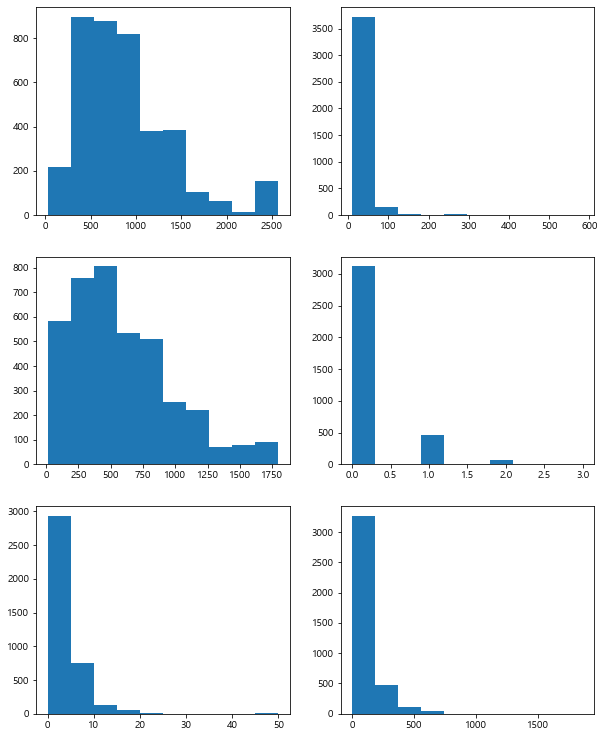

In [73]:
#ax는 행으로 나타내 진다. 
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10,13))

# X 축이 '총세대수'~~ & 히스토그램에서 Y축은 빈도수 
ax[0][0].hist(all_df_last['총세대수'])
ax[0][1].hist(all_df_last['전용면적'])
ax[1][0].hist(all_df_last['단지내주차면수'])   #[1] 1행
ax[1][1].hist(all_df_last['10분내지하철수'])
ax[2][0].hist(all_df_last['10분내버스정류장수']) #[2] 2행
ax[2][1].hist(all_df_last['전용면적별세대수'])

## train과 test 데이터셋을 다시 분리
### test에는 없는 '등록차량수' 컬럼을 추가로 붙여준다.

In [74]:
train_df = all_df_last.iloc[0:2896,:]  #train.shape에서 (2896, 15) 이었으니까, test의 행은 2897부터 시작
test_df = all_df_last.iloc[2896:,:]

train_df.shape, test_df.shape

train_df = pd.concat([train_df, train['등록차량수'] ], axis=1) #열기준으로 옆에 하나 더 붙음
train_df

,단지코드,총세대수,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,임대건물구분_lbl,지역_lbl,공급유형_lbl,단지코드_lbl,qcut_총세대수,단지코드_Type,등록차량수
0,C2515,545,33.48,276.0,17.0,1,9216000,82940,0.0,3.0,624.0,1,1,1,492,1,3.0,205.0
1,C2515,545,39.60,60.0,17.0,1,12672000,107130,0.0,3.0,624.0,1,1,1,492,1,3.0,205.0
2,C2515,545,39.60,20.0,17.0,1,12672000,107130,0.0,3.0,624.0,1,1,1,492,1,3.0,205.0
3,C2515,545,46.90,38.0,17.0,1,18433000,149760,0.0,3.0,624.0,1,1,1,492,1,3.0,205.0
4,C2515,545,46.90,19.0,17.0,1,18433000,149760,0.0,3.0,624.0,1,1,1,492,1,3.0,205.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2891,C2532,239,49.20,19.0,7.0,1,11346000,116090,0.0,1.0,166.0,1,5,1,501,0,3.0,146.0
2892,C2532,239,51.08,34.0,7.0,1,14005000,142310,0.0,1.0,166.0,1,5,1,501,0,3.0,146.0
2893,C2532,239,51.73,34.0,7.0,1,14005000,142310,0.0,1.0,166.0,1,5,1,501,0,3.0,146.0
2894,C2532,239,51.96,114.0,7.0,1,14005000,142310,0.0,1.0,166.0,1,5,1,501,0,3.0,146.0


## 새로운 특징만들고 corr() 확인

In [75]:
train_df['log_등록차량수'] = np.log1p(train_df['등록차량수'])

In [76]:
from sklearn.model_selection import train_test_split

print("등록차량수 상관계수 : ", train_df.corr()['등록차량수'])

print()

print("log_등록차량수 상관계수 ; ", train_df.corr()['log_등록차량수'])

등록차량수 상관계수 :  총세대수          0.333440
전용면적          0.112717
전용면적별세대수      0.250513
공가수           0.118910
자격유형         -0.154034
10분내지하철수     -0.107308
10분내버스정류장수    0.104200
단지내주차면수       0.861338
임대건물구분_lbl   -0.449130
지역_lbl        0.060674
공급유형_lbl     -0.137277
단지코드_lbl     -0.062077
qcut_총세대수     0.401309
단지코드_Type     0.109893
등록차량수         1.000000
log_등록차량수     0.881679
Name: 등록차량수, dtype: float64

log_등록차량수 상관계수 ;  총세대수          0.228964
전용면적          0.111644
전용면적별세대수      0.274772
공가수           0.200793
자격유형         -0.238579
10분내지하철수     -0.125054
10분내버스정류장수    0.080122
단지내주차면수       0.805096
임대건물구분_lbl   -0.596565
지역_lbl        0.108532
공급유형_lbl     -0.291515
단지코드_lbl     -0.065896
qcut_총세대수     0.303550
단지코드_Type     0.093261
등록차량수         0.881679
log_등록차량수     1.000000
Name: log_등록차량수, dtype: float64


### 데이터 나누고 모델 생성 및 결정계수 점수 확인

In [77]:
sel = [ '총세대수', '전용면적', '공가수', '단지내주차면수', 
       'qcut_총세대수', '자격유형', '전용면적별세대수', '10분내버스정류장수',
       '임대건물구분_lbl', '공급유형_lbl', '지역_lbl', '단지코드_lbl', 
       '단지코드_Type']

lable_name = 'log_등록차량수'
X = train_df[sel]
y = train_df[lable_name]
test_X = test_df[sel]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.1, 
                                                    random_state=0)

In [78]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
#import xgboost as xgb
#import lightgbm as lgb

In [79]:
train_df[sel].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2896 entries, 0 to 2895
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   총세대수        2896 non-null   int64  
 1   전용면적        2896 non-null   float64
 2   공가수         2896 non-null   float64
 3   단지내주차면수     2896 non-null   float64
 4   qcut_총세대수   2896 non-null   int64  
 5   자격유형        2896 non-null   int32  
 6   전용면적별세대수    2896 non-null   float32
 7   10분내버스정류장수  2896 non-null   float64
 8   임대건물구분_lbl  2896 non-null   int64  
 9   공급유형_lbl    2896 non-null   int64  
 10  지역_lbl      2896 non-null   int64  
 11  단지코드_lbl    2896 non-null   int16  
 12  단지코드_Type   2896 non-null   float64
dtypes: float32(1), float64(5), int16(1), int32(1), int64(5)
memory usage: 277.2 KB


In [80]:
model = RandomForestRegressor(n_jobs=-1)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("학습(score) :", model.score(X_train, y_train) ) # 결정계수
print("테스트(score) :", model.score(X_test, y_test) ) # 결정계수

학습(score) : 0.9990836903755834
테스트(score) : 0.9984274140720105


In [81]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("학습(score) :", model.score(X_train, y_train) ) # 결정계수
print("테스트(score) :", model.score(X_test, y_test) ) # 결정계수

학습(score) : 0.9593065220119666
테스트(score) : 0.959563894227124


## 

In [82]:
import time

In [83]:
now_time = time.time()

model_RF = RandomForestRegressor(n_estimators = 1000, 
                                 random_state=0, n_jobs=-1)
model_RF.fit(X_train, y_train)
score = cross_val_score(model_RF, X_train, y_train, 
                        cv=5, scoring="neg_mean_absolute_error") # neg_mean_squared_error
m_score = np.abs(score.mean())
print("RandomForestRegressor Score : {}".format(m_score))  # 점수

pro_time = time.time() - now_time
print(pro_time)  # 걸린 시간

RandomForestRegressor Score : 0.032530860559929896
16.461409091949463


In [84]:
model_last = RandomForestRegressor(n_estimators = 1000,
                                 random_state=0, n_jobs=-1)
model_last.fit(X_train, y_train)
pred = model_last.predict(test_X)
pred[0:10]

array([6.51395237, 6.57949069, 6.51657389, 6.51659953, 6.51607582,
       6.51624372, 6.52037865, 6.52275343, 7.13948803, 7.13581967])

##  모델 선택 및 제출용 파일을 위한 '단지별차량수평균 '특징 추가

In [85]:
test_df['등록차량수'] = np.expm1(pred)
test_df['단지별차량수평균'] = test_df.groupby("단지코드")['등록차량수'].transform(np.mean)
test_new = test_df.drop_duplicates(['단지코드'], keep='first').reset_index() # 중복 제거
test_new

<ipython-input-85-6716df3fa527>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['등록차량수'] = np.expm1(pred)
<ipython-input-85-6716df3fa527>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['단지별차량수평균'] = test_df.groupby("단지코드")['등록차량수'].transform(np.mean)


,index,단지코드,총세대수,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,임대건물구분_lbl,지역_lbl,공급유형_lbl,단지코드_lbl,qcut_총세대수,단지코드_Type,등록차량수,단지별차량수평균
0,0,C1072,754,39.79,116.0,14.0,8,22830000,189840,0.0,2.0,683.0,1,3,1,32,2,3.0,673.486976,681.303931
1,8,C1128,1354,39.79,368.0,9.0,8,22830000,189840,0.0,3.0,1216.0,1,3,1,43,4,3.0,1259.782740,1245.109513
2,17,C1456,619,33.40,82.0,18.0,1,19706000,156200,0.0,16.0,547.0,1,8,1,143,1,3.0,547.209356,600.443935
3,26,C1840,593,39.57,253.0,7.0,1,14418000,108130,0.0,3.0,543.0,1,4,1,263,1,3.0,558.390396,560.314911
4,30,C1332,1297,39.99,282.0,11.0,8,28598000,203050,0.0,2.0,1112.0,1,3,1,110,4,3.0,1146.521034,1148.009807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,982,C2456,349,26.44,24.0,17.0,8,6992000,117000,0.0,4.0,270.0,1,9,1,471,0,1.0,241.815839,255.834490
143,986,C1266,596,26.94,164.0,35.0,8,8084000,149910,0.0,1.0,593.0,1,11,1,85,1,1.0,412.481994,413.792572
144,991,C2152,120,24.83,66.0,9.0,3,-,-,0.0,1.0,40.0,1,5,3,369,0,3.0,25.882355,25.991825
145,993,C1267,675,24.87,28.0,38.0,8,6882000,104370,0.0,1.0,467.0,1,1,1,86,2,1.0,395.462358,399.862125


## 제출용 데이터 셋 처리 완료

In [86]:
add_dat = {'code':['C2675', 'C2335', 'C1327'],
           'num':['0', '0', '0']}
add_df = pd.DataFrame(add_dat)

In [87]:
sub_df = test_new[ ['단지코드', '단지별차량수평균']]
sub_df.columns = ['code', 'num']
sub_df = pd.concat([sub_df, add_df]).reset_index()
sub_df = sub_df.drop(['index'], axis=1)
sub_df

,code,num
0,C1072,681.304
1,C1128,1245.11
2,C1456,600.444
3,C1840,560.315
4,C1332,1148.01
...,...,...
145,C1267,399.862
146,C2189,253.447
147,C2675,0
148,C2335,0


In [88]:
sub_df.to_csv('baseline_0720.csv', index=False)
sub_df.head()

,code,num
0,C1072,681.304
1,C1128,1245.11
2,C1456,600.444
3,C1840,560.315
4,C1332,1148.01


In [89]:
pip install lightgbm

In [90]:
import lightgbm as lgb
hyperparameters = {'boosting_type': 'gbdt',
                   'colsample_bytree': 0.7250136792694301,
                   'is_unbalance': False,
                   'learning_rate': 0.013,
                   'min_child_samples': 20,
                   'num_leaves': 56,
                   'subsample': 0.5233384321711397,
                   'n_estimators': 1000}

##우선, 'learning_rate'와 n_estimators' 만 건지면 된다. 

In [91]:
# lightgbm 모델 생성 및 학습 그리고 교차검증 평가 확인.

now_time = time.time()
m_lgbm1 = lgb.LGBMRegressor(**hyperparameters)
m_lgbm1.fit(X_train, y_train)
score = cross_val_score(m_lgbm1, X_train, y_train,
                        cv=5, scoring="neg_mean_absolute_error")
m_score = np.abs(score.mean())  # 절대값
pro_time = time.time() - now_time
print(pro_time)  # 걸린 시간
print("LightGBM Score : {}".format(m_score))  # 점수

10.77166199684143
LightGBM Score : 0.04459292096438179



## 하이퍼 파라미터(n_estimators, learning_rate) 와 모델과 선택 변수를 변경해 보면서. 가장 좋은 모델을 선택해서 결과를 만들고, 제출해 보자.

qcut값이랑, learning_rate'와 n_estimators' 을 조정하면서 점수를 올려보자! 